## Fluxes through boundaries

This notebook looks at what things are going in and out of the periodic boundaries. E and W.

In [1]:
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
def AreaWallCross(hfac,dr,dy,xx):
    '''Calculate area of wall.
    -----------------------------------------------------------------------------------
    INPUT
    hfac : Fraction of open cell at cell center (hFacC)     
    dr : r cell face separation (drf)
    dx : x cell center separation (dxf)
    zlev : vertical level to find shelf break indices
    
    OUTPUT
    area : np 2D array size y,z 
    '''
    sizes = np.shape(hfac)
    nx = sizes[2]
    ny = sizes[1]
    nz = sizes[0]
    
    area = np.empty((nz,ny))
    
    for ii in range(ny):
        area[:,ii] = hfac[:,ii,xx] * dr[:] * dy[ii,xx]
   
    return(area)
    

In [4]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


In [5]:
# run01
stateFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/stateGlob.nc'
StateOut1 = Dataset(stateFile1)

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/gridGlob.nc'
GridOut = Dataset(gridFile)
#for dimobj in GridOut.variables.values():
#    print dimobj
ptracersFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run05/ptracersGlob.nc'
PtracersOut1 = Dataset(ptracersFile1)


In [6]:
z = StateOut1.variables['Z']
Time = StateOut1.variables['T']

xc = rout.getField(gridFile, 'XC') # x coords tracer cells
yc = rout.getField(gridFile, 'YC') # y coords tracer cells

xg = rout.getField(gridFile, 'XG') # x coords vort cells
yg = rout.getField(gridFile, 'YG') # y coords vort cells


drF = GridOut.variables['drF'] # vertical distance between faces

dxG = rout.getField(gridFile,'dxG')
dyG = rout.getField(gridFile,'dyG')

bathy = rout.getField(gridFile, 'Depth')

rA = rout.getField(gridFile, 'rA') # area of cells (x-y)
hFacC = rout.getField(gridFile, 'HFacC')
MaskC = rout.getMask(gridFile,'HFacC') # same for 3 runs

hFacS = rout.getField(gridFile, 'HFacS')
MaskS = rout.getMask(gridFile,'HFacS') # same for 3 runs

hFacW = rout.getField(gridFile, 'HFacW')
MaskW = rout.getMask(gridFile,'HFacW') # same for 3 runs

X = StateOut1.variables['X']
Y = StateOut1.variables['Y']
Xp1 = StateOut1.variables['Xp1']
Yp1 = StateOut1.variables['Yp1']


In [7]:
#print(xc[0,:])
#print(xg[0,:])

In [8]:
Tr1 = rout.getField(ptracersFile1,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3

U = rout.getField(stateFile1,'U') 
V = rout.getField(stateFile1,'V') 



In [9]:
print(np.shape(V))
print(np.shape(U))


(19, 90, 361, 360)
(19, 90, 360, 361)


(19,)


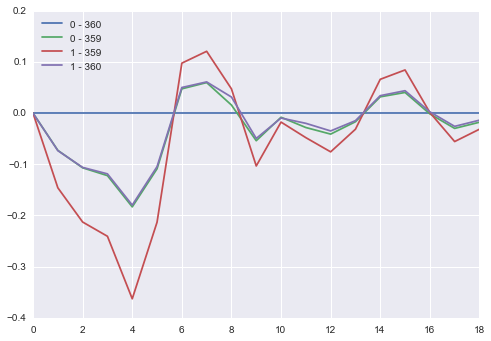

In [25]:

sumBdy0 = np.sum(np.sum((U[:,:,:,0]-U[:,:,:,360]),axis=1),axis=1)
sumBdy1 = np.sum(np.sum((U[:,:,:,0]-U[:,:,:,359]),axis=1),axis=1)
sumBdy2 = np.sum(np.sum((U[:,:,:,1]-U[:,:,:,359]),axis=1),axis=1)
sumBdy3 = np.sum(np.sum((U[:,:,:,1]-U[:,:,:,360]),axis=1),axis=1)

print(np.shape(sumBdy))
plt.plot(sumBdy0,label='0 - 360')
plt.plot(sumBdy1,label='0 - 359')
plt.plot(sumBdy2,label='1 - 359')
plt.plot(sumBdy3,label='1 - 360')
plt.legend(loc=0)

(19,)


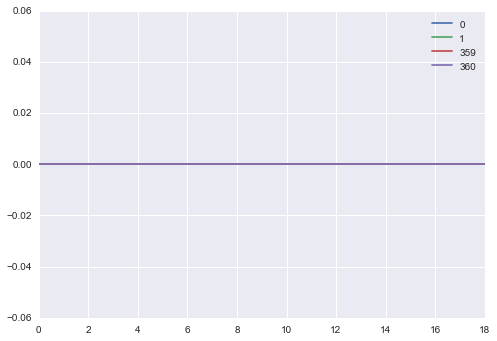

In [27]:
sumBdy0 = np.sum(np.sum((V[:,:,0,:]),axis=1),axis=1)
sumBdy1 = np.sum(np.sum((V[:,:,1,:]),axis=1),axis=1)
sumBdy2 = np.sum(np.sum((V[:,:,359,:]),axis=1),axis=1)
sumBdy3 = np.sum(np.sum((V[:,:,360,:]),axis=1),axis=1)

print(np.shape(sumBdy))
plt.plot(sumBdy0,label='0')
plt.plot(sumBdy1,label='1')
plt.plot(sumBdy2,label='359')
plt.plot(sumBdy3,label='360')
plt.legend(loc=0)

## Water transport through  E and W periodic boundaries

<matplotlib.colorbar.Colorbar instance at 0x7fd6a10f76c8>

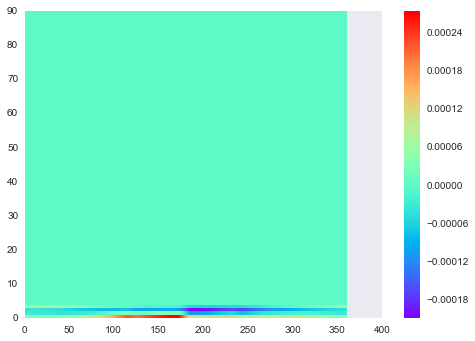

In [42]:
plt.pcolor(V[10,:,358,:],cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fd6a2275440>

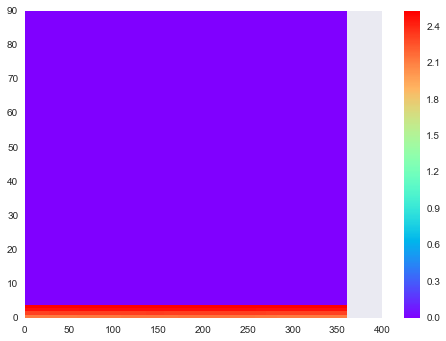

In [41]:
plt.pcolor(Tr1[10,:,358,:],cmap='rainbow')
plt.colorbar()

In [43]:
# run01
stateFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/stateGlob.nc'
StateOut1 = Dataset(stateFile1)

gridFile='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/gridGlob.nc'
GridOut = Dataset(gridFile)
#for dimobj in GridOut.variables.values():
#    print dimobj
ptracersFile1='/ocean/kramosmu/MITgcm/TracerExperiments/NOGMREDI/run02/ptracersGlob.nc'
PtracersOut1 = Dataset(ptracersFile1)


In [44]:
Tr1 = rout.getField(ptracersFile1,'Tr1') # [Tr#Run#] = mol/L = mol/dm^3

U = rout.getField(stateFile1,'U') 
V = rout.getField(stateFile1,'V') 


<matplotlib.colorbar.Colorbar instance at 0x7fd685d2b320>

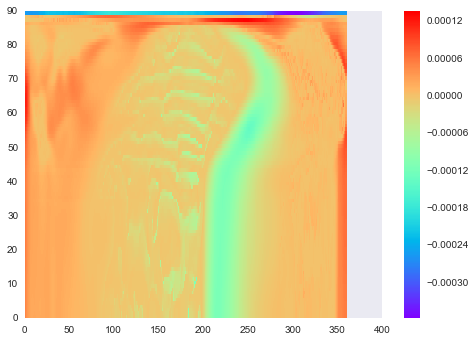

In [70]:
plt.pcolor(V[10,:,0,:]-V[10,:,2,:],cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fd68b521638>

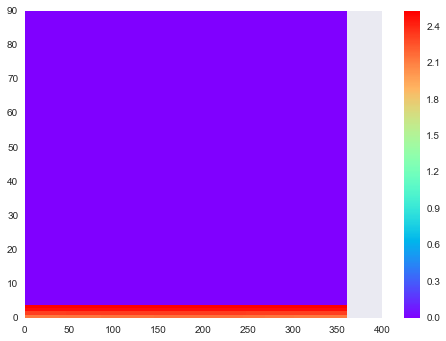

In [65]:
plt.pcolor(Tr1[10,:,358,:],cmap='rainbow')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fd681708c20>

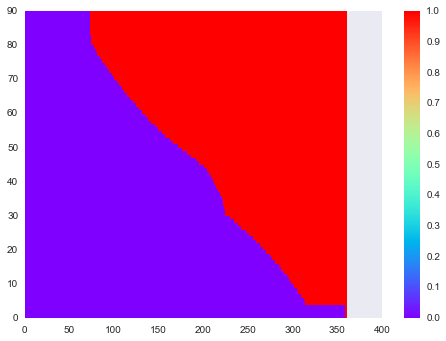

In [84]:
plt.pcolor(MaskC[:,:,0],cmap='rainbow')
plt.colorbar()

In [82]:
balance =[       0.          +2809913.16526222  +3433567.64723969  +2637114.31382751
  +5223082.9336853   +1896584.45733643   +482173.77418518  +1941892.0136261
   -81780.73884583  -450402.91732788   +870534.79109192   +405983.69416809
   +557400.34992981   +742282.46530151   +155356.0161438     +11242.07843018
   +724215.99829102   +632972.39041138   +597913.18240356]

print('%e' %np.sum(balance))

2.259005e+07


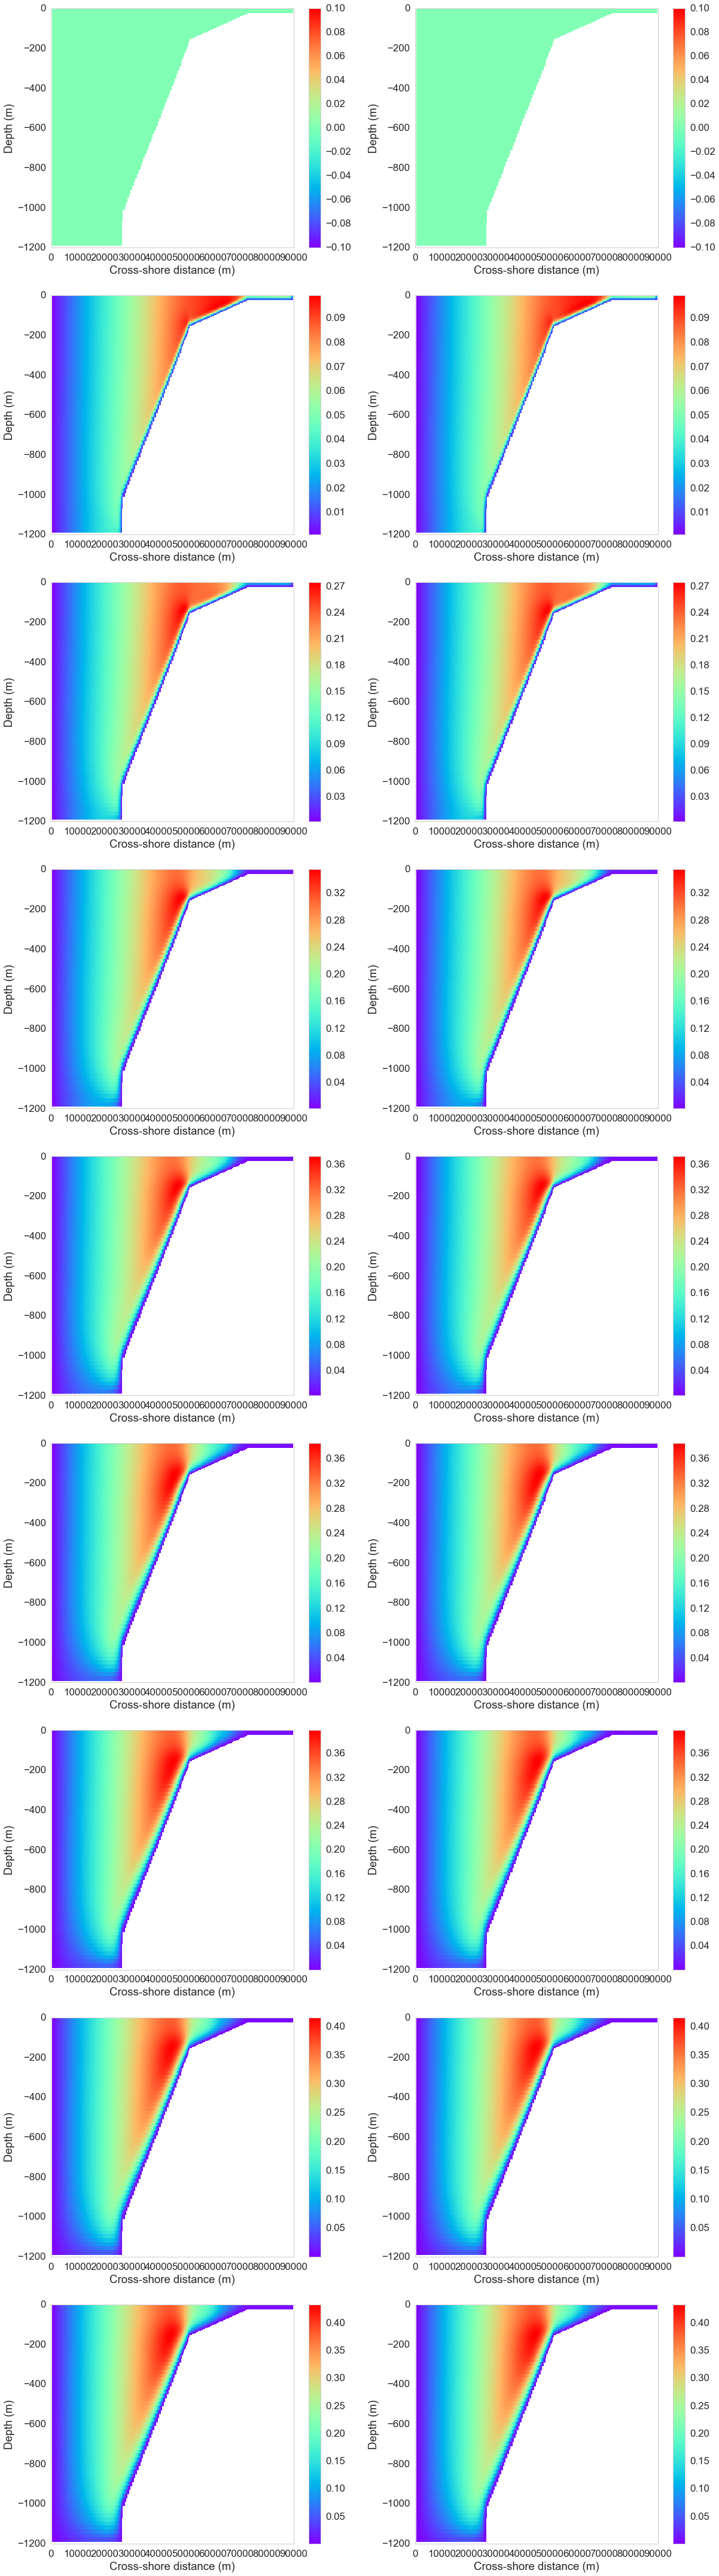

In [25]:
fig67 = plt.figure(figsize=(20,76))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

kk = 1

for tt in range(0,18,2):
    
    plt.subplot(9,2,kk)
    ax = plt.gca()
    
    field=np.ma.array(U[tt,:,:,1],mask=MaskW[:,:,1])
    plt.pcolor(Y[:],z[:],field,cmap = 'rainbow')
    plt.colorbar()
    plt.ylabel('Depth (m) ')
    plt.xlabel('Cross-shore distance (m)')
    
    kk = kk+1

    plt.subplot(9,2,kk)
    ax = plt.gca()
    
    field=np.ma.array(U[tt,:,:,360],mask=MaskW[:,:,360])
    plt.pcolor(Y[:],z[:],field,cmap = 'rainbow')
    plt.colorbar()
    plt.ylabel('Depth (m) ')
    plt.xlabel('Cross-shore distance (m)')
    
    kk = kk+1

#fig66.savefig('/ocean/kramosmu/Figures/.eps', format='eps', dpi=1000, bbox_inches='tight')



West Time-integrated transport of water is 5.185668e+12 $m^3/s$
East Time-integrated transport of water is 5.185668e+12 $m^3/s$
Difference is 1.211323e+04 $m^3/s$


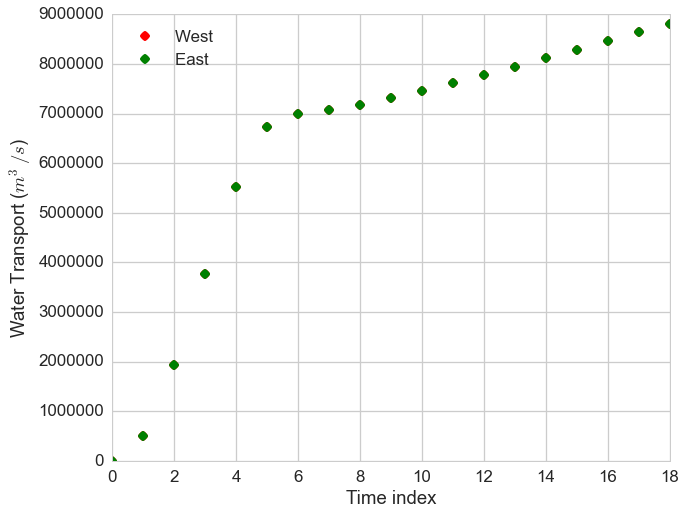

In [27]:
fig67 = plt.figure(figsize=(10,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

kk = 1
AwallW = AreaWallCross(hFacW,drF,dyG,1)
AwallE = AreaWallCross(hFacW,drF,dyG,360)

TransportWv = np.empty(19)
TransportEv = np.empty(19)

for tt in range(19):
    
    field=np.ma.array(U[tt,:,:,1],mask=MaskW[:,:,1])
    
    TransportWv[tt] = np.sum(AwallW[:,:]*field)
    
    field=np.ma.array(U[tt,:,:,359],mask=MaskW[:,:,359])
    
    TransportEv[tt] = np.sum(AwallE[:,:]*field)


print('West Time-integrated transport of water is %e $m^3/s$' %(3600*12*np.sum(TransportWv)) )
print('East Time-integrated transport of water is %e $m^3/s$' %(3600*12*np.sum(TransportEv)) )
print('Difference is %e $m^3/s$' %(3600*12*np.sum(TransportWv)-3600*12*np.sum(TransportEv)))

#fig66.savefig('/ocean/kramosmu/Figures/.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.plot(TransportWv,'ro',label='West ')
plt.plot(TransportEv,'go',label='East ')
plt.xlabel('Time index')
plt.ylabel('Water Transport ($m^3/s$)')
plt.legend(loc =0)

### Tracer transport through periodic boundaries

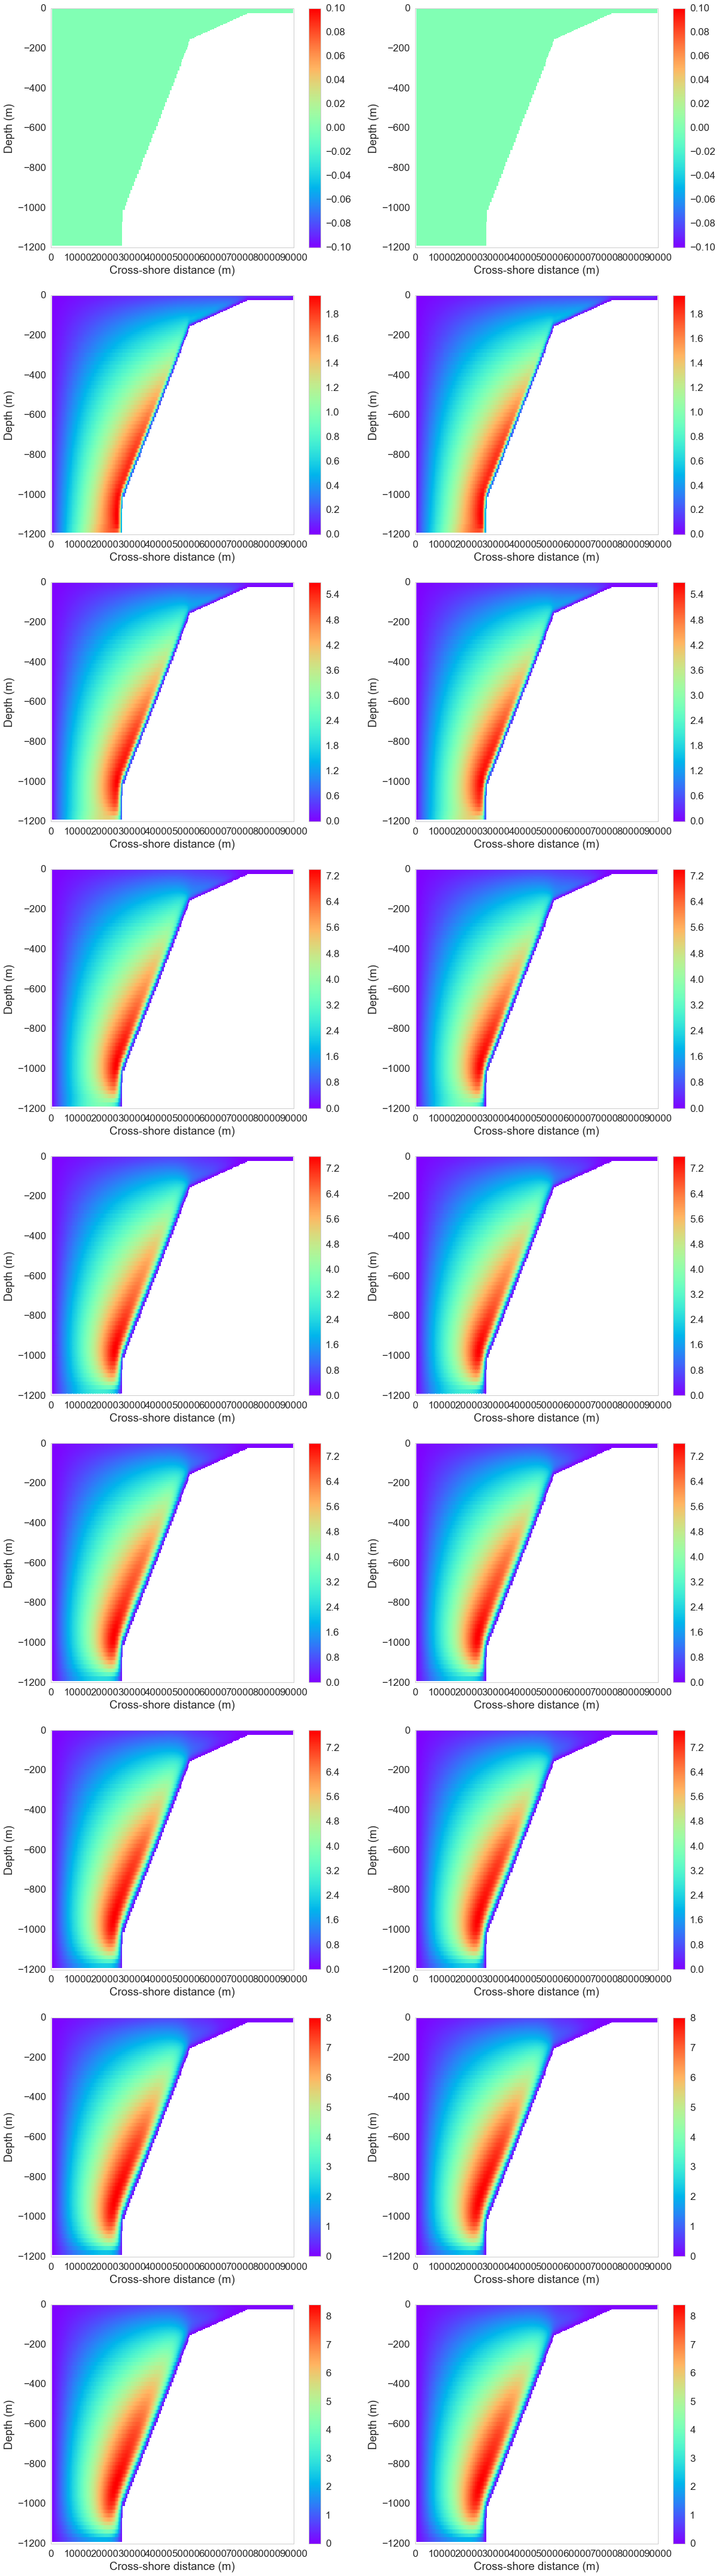

In [29]:
fig67 = plt.figure(figsize=(20,76))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

kk = 1

for tt in range(0,18,2):
    
    plt.subplot(9,2,kk)
    ax = plt.gca()
    
    vel = np.ma.array(U[tt,:,:,0],mask=MaskW[:,:,0])
    field = np.ma.array(Tr1[tt,:,:,0],mask=MaskC[:,:,0])
    
    plt.pcolor(Y[:],z[:],field*vel,cmap = 'rainbow')
    plt.colorbar()
    plt.ylabel('Depth (m) ')
    plt.xlabel('Cross-shore distance (m)')
    
    kk = kk+1

    plt.subplot(9,2,kk)
    ax = plt.gca()
    
    vel=np.ma.array(U[tt,:,:,360],mask=MaskW[:,:,360])
    field=np.ma.array(Tr1[tt,:,:,359],mask=MaskC[:,:,359])
    
    plt.pcolor(Y[:],z[:],field*vel,cmap = 'rainbow')
    plt.colorbar()
    plt.ylabel('Depth (m) ')
    plt.xlabel('Cross-shore distance (m)')
    
    kk = kk+1

#fig66.savefig('/ocean/kramosmu/Figures/.eps', format='eps', dpi=1000, bbox_inches='tight')



West Time-integrated transport of tracer 1 is 7.800889e+17 $mol$
East Time-integrated transport of tracer 1 is 7.800897e+17 $mol$
Difference is -8.528001e+11 $m^3/s$


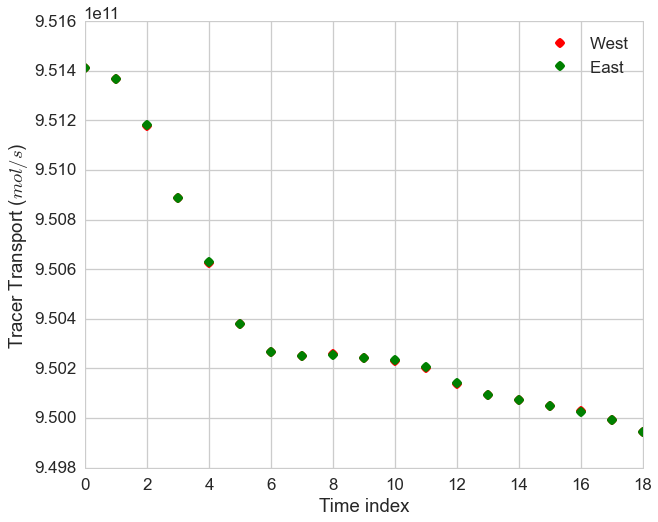

In [37]:
fig67 = plt.figure(figsize=(10,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

kk = 1
AwallW = AreaWallCross(hFacW,drF,dyG,1)
AwallE = AreaWallCross(hFacW,drF,dyG,360)

TransportWvTr1 = np.empty(19)
TransportEvTr1 = np.empty(19)

for tt in range(19):
    
    vel = np.ma.array(U[tt,:,:,1],mask=MaskW[:,:,1])
    field1 = np.ma.array(Tr1[tt,:,:,1],mask=MaskC[:,:,1])
     
    TransportWvTr1[tt] = np.sum(AwallW[:,:]*field1*1000)
    
    vel=np.ma.array(U[tt,:,:,360],mask=MaskW[:,:,360])
    field1=np.ma.array(Tr1[tt,:,:,359],mask=MaskC[:,:,359])
    
    TransportEvTr1[tt] = np.sum(AwallW[:,:]*field1*1000)
    

print('West Time-integrated transport of tracer 1 is %e $mol$' %(np.sum(TransportWvTr1)*12*3600) )
print('East Time-integrated transport of tracer 1 is %e $mol$' %(np.sum(TransportEvTr1)*12*3600) )
print('Difference is %e $m^3/s$' %(np.sum(TransportWvTr1)*12*3600-np.sum(TransportEvTr1)*12*3600))



#fig66.savefig('/ocean/kramosmu/Figures/.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.plot(TransportWvTr1,'ro',label='West ')
plt.plot(TransportEvTr1,'go',label='East ')
plt.xlabel('Time index')
plt.ylabel('Tracer Transport ($mol/s$)')
plt.legend(loc =0)